In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

%matplotlib inline

with open('data.yml') as fp:
  meta = yaml.load(fp)

In [2]:
from ipywidgets import interact

def f(run_csv_update):
    if run_csv_update:
        %run update_csv.py

interact(f, run_csv_update=False);

In [3]:
for period in meta['eia'].keys():
    display(HTML('<h3>%s</h3>' % period.upper()))
    for i,d in enumerate(meta['eia'][period]):
        print '%s) '%i, d['varname']

0)  U.S. Net Imports from Venezuela of Crude Oil and Petroleum Products, Monthly
1)  U.S. Net Imports from Mexico of Crude Oil and Petroleum Products, Monthly
2)  U.S. Ending Stocks of Crude Oil in SPR, Monthly
3)  U.S. Product Supplied of Crude Oil, Monthly
4)  U.S. Product Supplied of Crude Oil and Petroleum Products, Monthly
5)  Crude Oil and Liquid Fuels Supply, United States, Monthly
6)  U.S. Field Production of Crude Oil and Petroleum Products, Monthly
7)  U.S. Refinery Net Input of Crude Oil, Monthly
8)  U.S. Product Supplied of Crude Oil and Petroleum Products, Monthly
9)  U.S. Ending Stocks of Total Petroleum Products, Monthly
10)  U.S. Field Production of Crude Oil, Monthly
11)  U.S. Crude Oil Rotary Rigs in Operation, Monthly
12)  U.S. Crude Oil and Natural Gas Rotary Rigs in Operation, Monthly
13)  Cushing, OK WTI Spot Price FOB, Monthly
14)  U.S. Ending Stocks of Total Petroleum Products, Monthly


0)  U.S. Crude Oil Exploratory Wells Drilled, Annual
1)  U.S. Crude Oil Stock Change, Annual


0)  U.S. Imports of Crude Oil and Petroleum Products, Weekly
1)  U.S. Exports of Crude Oil and Petroleum Products, Weekly
2)  U.S. Field Production of Crude Oil, Weekly
3)  Cushing, OK WTI Spot Price FOB, Weekly
4)  U.S. Ending Stocks of Crude Oil, Weekly
5)  U.S. Ending Stocks of Crude Oil in SPR, Weekly


In [4]:
# csv read options
csv_kargs = dict(index_col='Date', parse_dates=True)
# plot options
plot_kargs = dict(figsize=(15,5), legend=False)

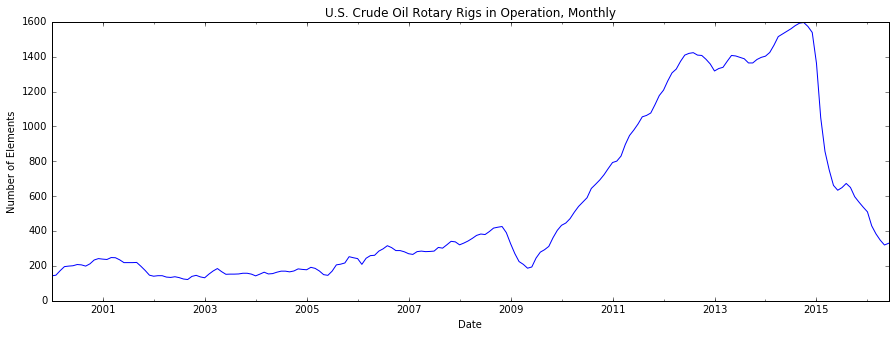

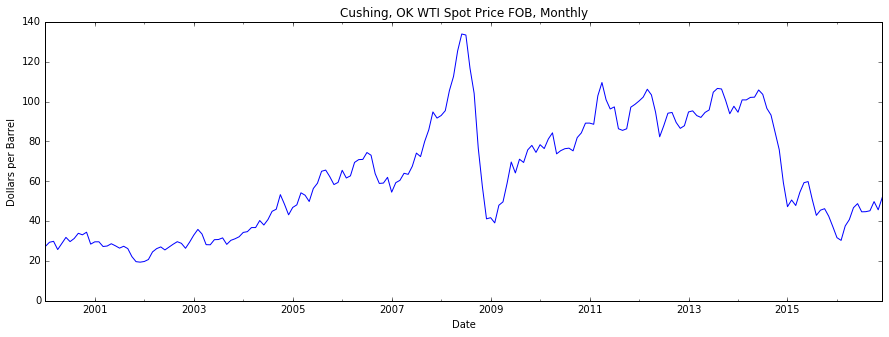

In [5]:
index_plot = [11,13]
for i in index_plot:
    serie = meta['eia']['monthly'][i]
    df = pd.read_csv(serie['filename'], **csv_kargs)
    df['2000':].plot(title=serie['varname'], **plot_kargs)
    plt.ylabel(serie['units'])
    plt.show()

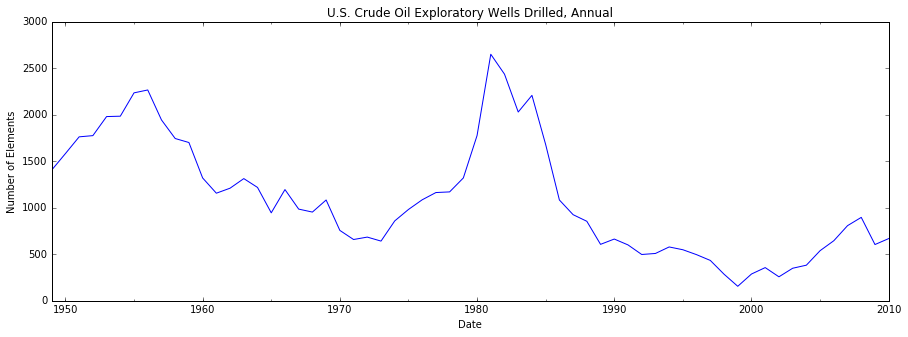

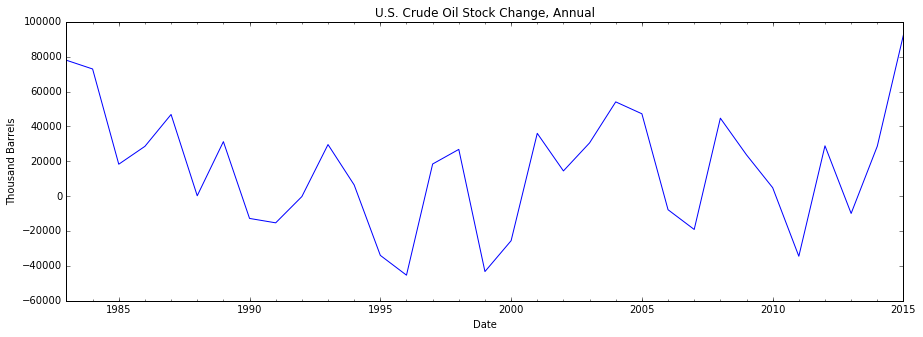

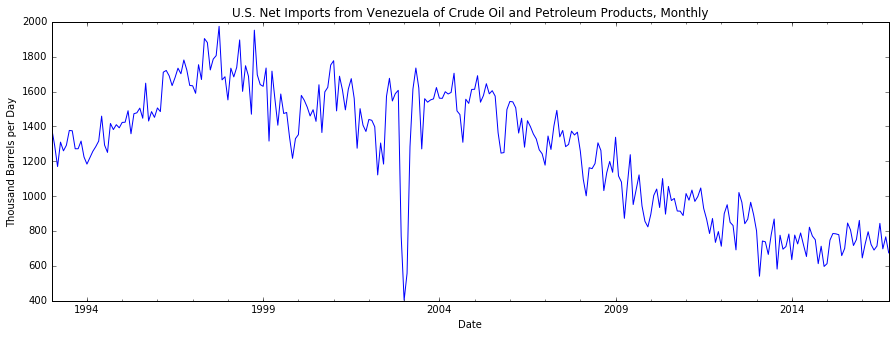

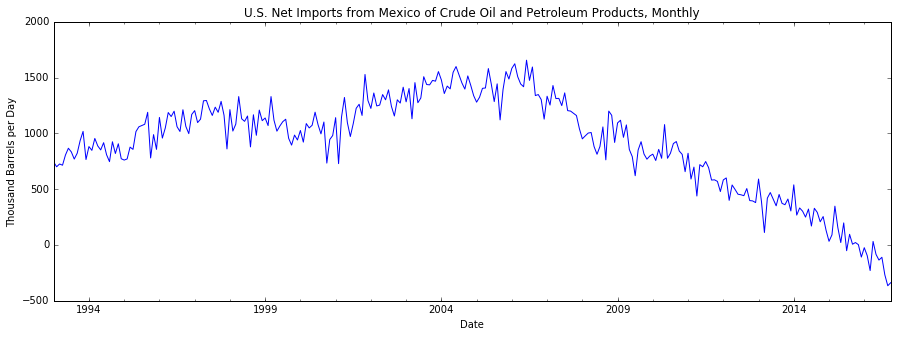

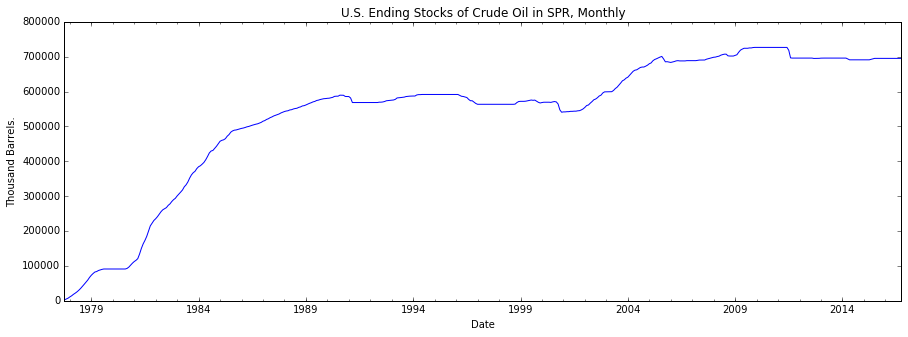

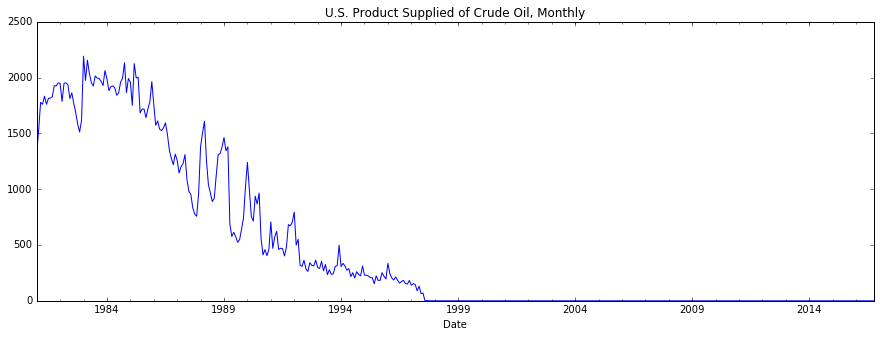

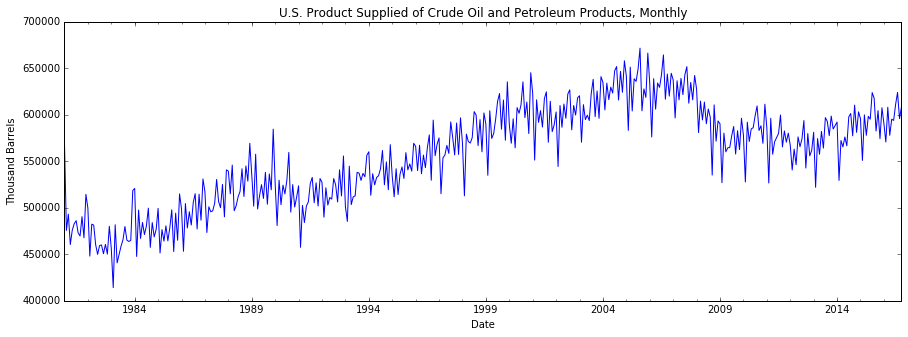

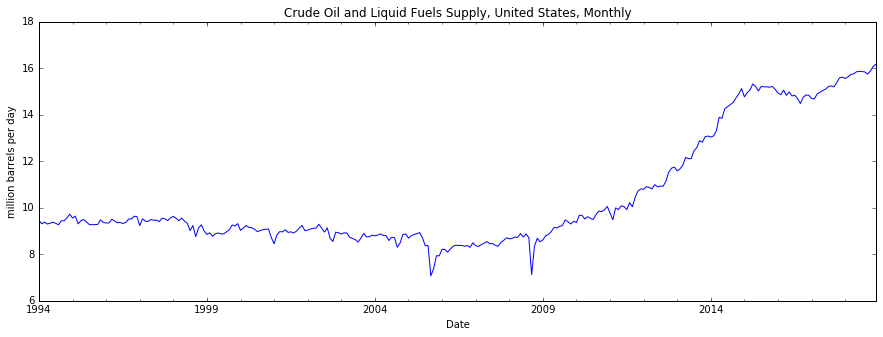

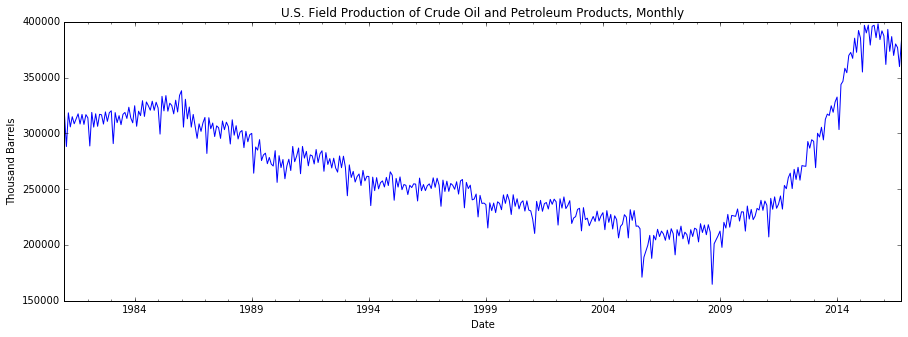

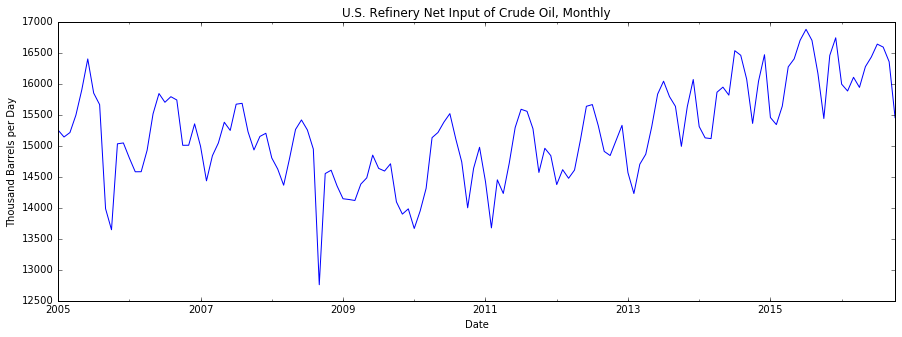

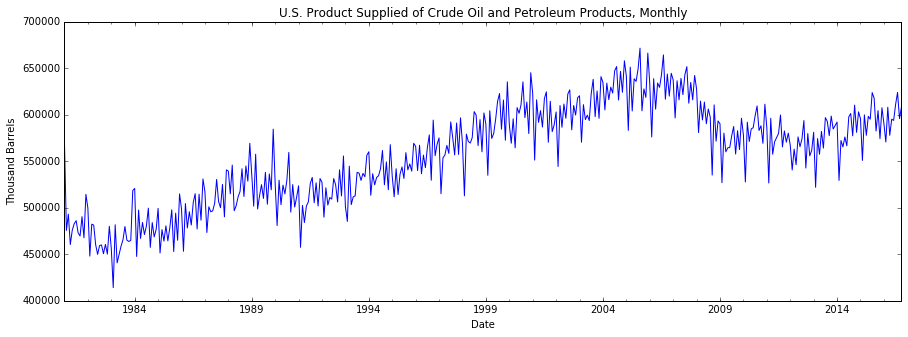

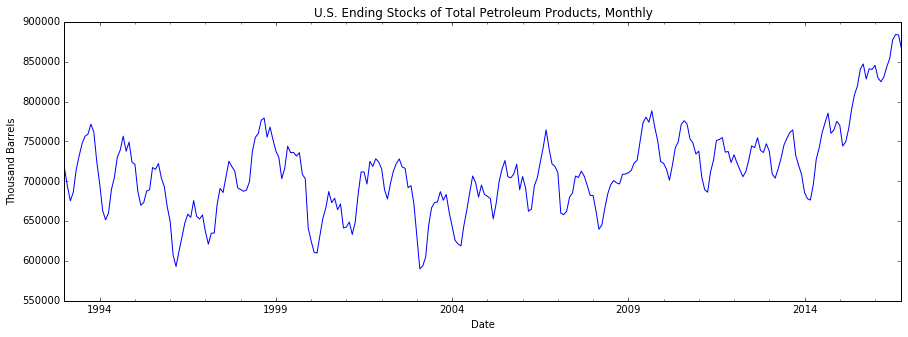

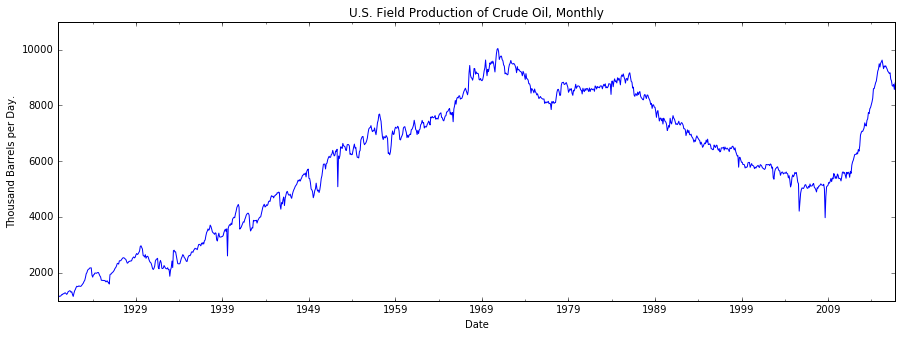

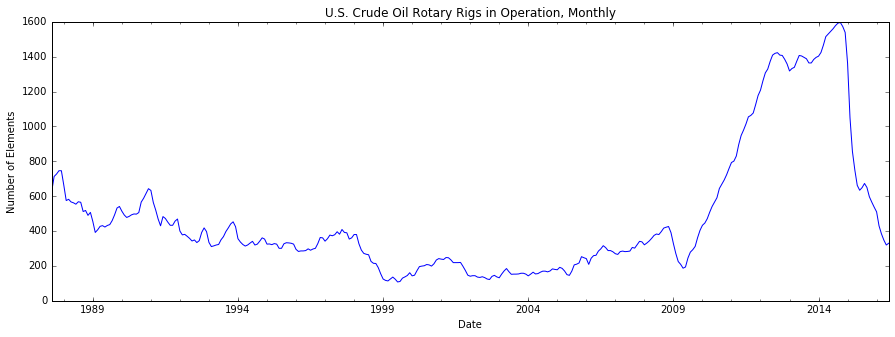

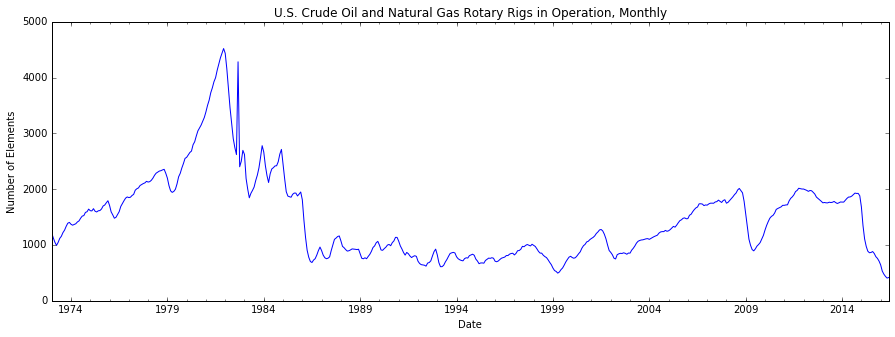

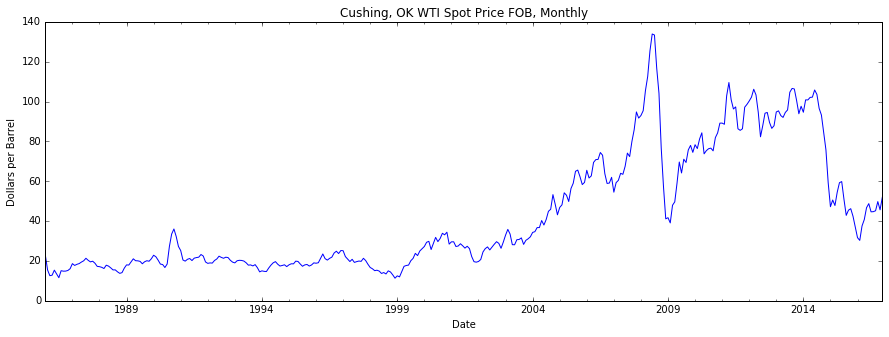

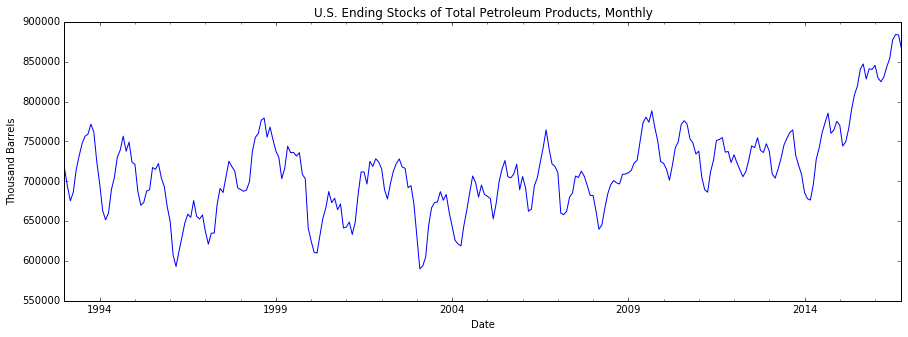

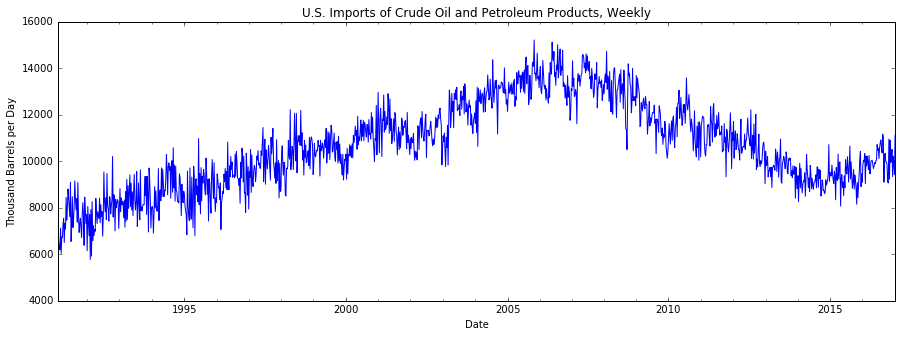

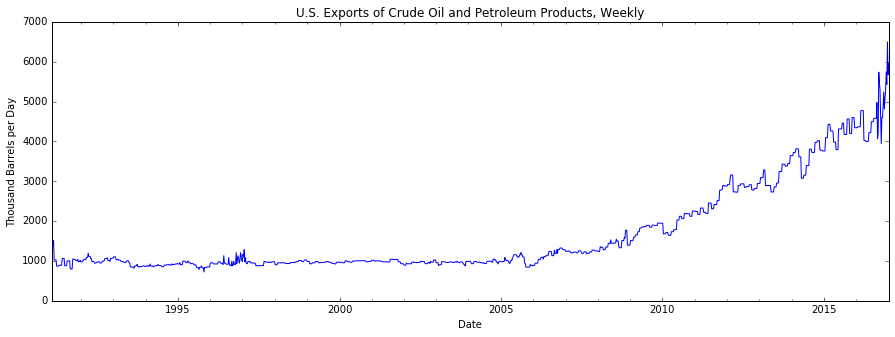

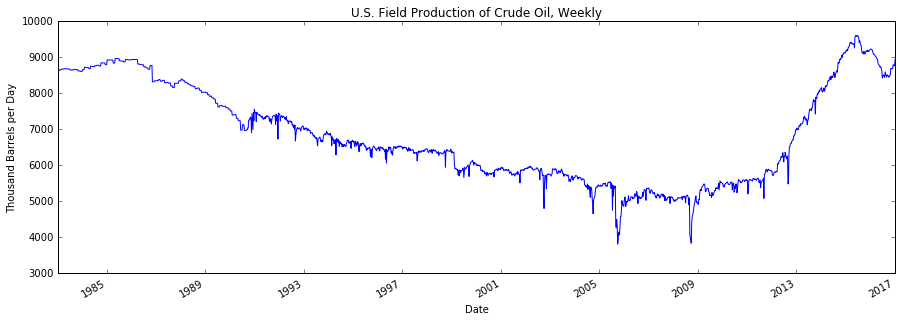

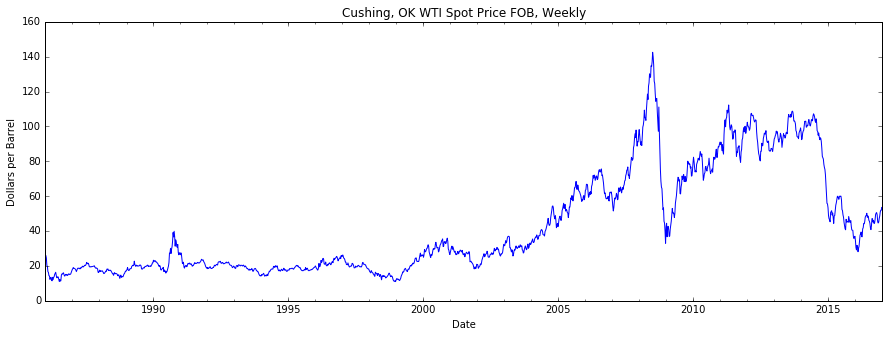

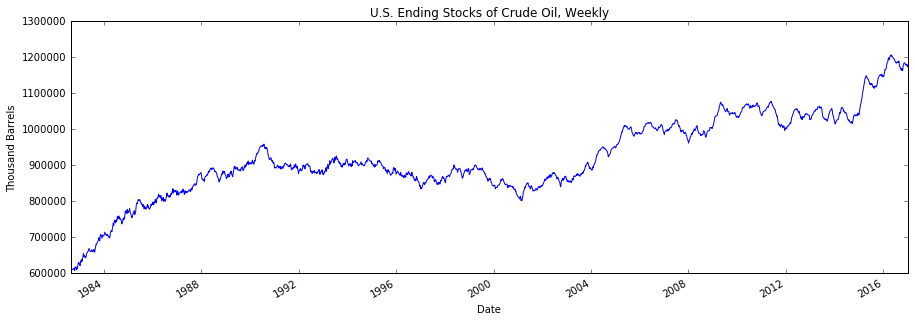

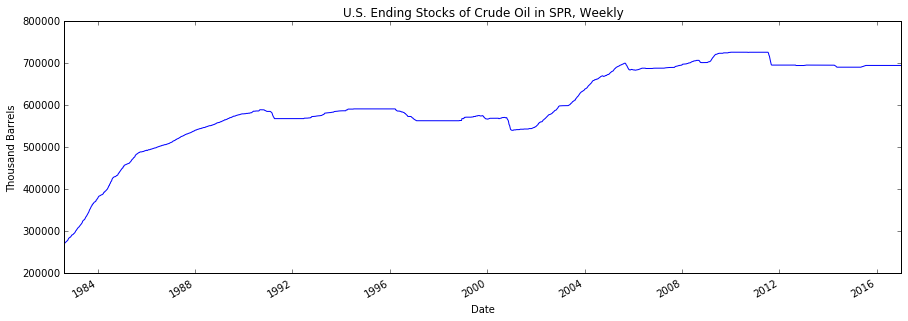

In [10]:
periods = sorted(meta['eia'].keys())
for period in periods:
    display(HTML('<h2>%s</h2>' % period.upper()))
    for serie in meta['eia'][period]:
        df = pd.read_csv(serie['filename'], **csv_kargs)
        df.plot(title=serie['varname'], **plot_kargs)
        plt.ylabel(serie['units'])
        plt.show()